In [2]:
# import tensorflow
import sklearn
import numpy as np
import matplotlib as mp
import pandas as pd
from sklearn import linear_model
from sklearn.utils import shuffle
import pickle

In [4]:
data = pd.read_csv("student-mat.csv", sep=";")

In [5]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [6]:
predict = "G3"

X = np.array(data.drop([predict], 1)) # Features or training data
y = np.array(data[predict]) # Labels or output

In [15]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1) 
# The test_size=0.1 divide the data in 90:10 ratio i.e 90% to train and 10% to test

In [16]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc=linear.score(x_test,y_test)
print(acc)

0.9453832930251278


In [17]:
print('Coeff: \n', linear.coef_) # Coeff for five differernt constants
print('Intercept: \n', linear.intercept_)

Coeff: 
 [ 0.15442566  0.98396108 -0.14688026 -0.23838749  0.03921948]
Intercept: 
 -1.6767103334016635


In [18]:
# Let's make a comparison of our model data and data that we have predicted
predictions=linear.predict(x_test)
for x in range(len(predictions)):
    print(x,': ',predictions[x], x_test[x], y_test[x])

0 :  12.263560057012997 [14 12  1  0  3] 12
1 :  3.6375010118957674 [6 5 2 1 0] 0
2 :  15.651950731697385 [16 15  2  0 10] 15
3 :  15.602733580633272 [16 15  1  0  5] 16
4 :  17.080797796700054 [16 17  3  0  0] 17
5 :  12.598144402833967 [11 13  2  0  2] 14
6 :  7.680172956761107 [ 9  8  2  1 16] 7
7 :  6.152661983314963 [8 7 2 0 0] 8
8 :  18.21163913752555 [16 18  2  0  0] 18
9 :  12.150806146712556 [12 12  1  0  8] 12
10 :  15.691170214491011 [16 15  2  0 11] 15
11 :  11.606637925682218 [10 12  1  0  2] 12
12 :  13.730604865768713 [13 13  2  0 23] 13
13 :  10.475796584856718 [10 11  2  0  2] 11
14 :  9.577819871752757 [11 10  3  0  4] 10
15 :  9.800686831203812 [12 10  2  0  2] 11
16 :  10.554235550443972 [10 11  2  0  4] 9
17 :  13.959398102340788 [13 14  1  0  0] 14
18 :  14.943359180262272 [13 15  1  0  0] 15
19 :  -0.8970366234999554 [6 0 1 0 0] 0
20 :  6.736264508564229 [6 8 1 1 0] 8
21 :  12.752570064968255 [12 13  2  0  2] 13
22 :  9.415848810388201 [ 9 10  2  0  4] 10
23 :  1

In [19]:
# Let's save our best suited model using pickle and plot data to check comparison
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style

In [20]:
with open("studentmodel.pickle",mode="wb") as f:
    pickle.dump(linear, f)

In [21]:
# Read pickle model to check our model
pickle_in = open("studentmodel.pickle","rb")
linar=pickle.load(pickle_in)

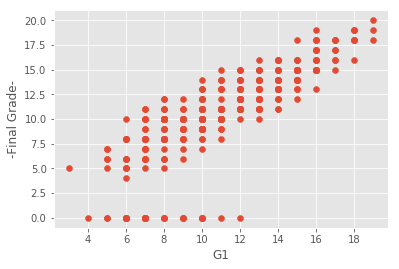

In [22]:
#plot
p='G1'
style.use("ggplot")
pyplot.scatter(data[p],data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("-Final Grade-")
pyplot.show()